Pełny zbiór danych:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       245
           1       0.87      0.89      0.88       255

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500


SVM:
              precision    rec

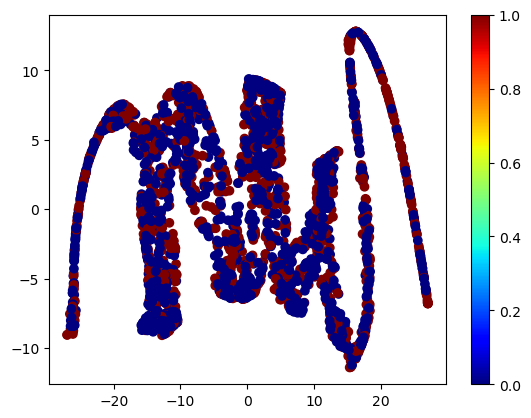

In [158]:
# Wczytanie zbioru danych
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Wczytanie zbioru California Housing
df = pd.read_csv("housing.csv")
print("Pełny zbiór danych:")
print(df.head())

# Ograniczenie do pierwszych 200 rekordów
df = df.head(2500)  # Wybór pierwszych 200 rekordów

# Przygotowanie danych
X = df.drop(columns=['Target'])  # Wszystkie kolumny oprócz docelowej
y = df['Target']  # Zmienna docelowa (np. wartość domu)
y = np.where(y > y.median(), 1, 0)  # 1 = wysokie wartości, 0 = niskie wartości

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Normalizacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Trenowanie klasyfikatorów
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

# Predykcja i ocena wyników
print("\nLogistic Regression:")
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

print("\nSVM:")
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

print("\nKNN:")
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

# Redukcja wymiarowości
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Wizualizacja wyników t-SNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='jet')
plt.colorbar()
plt.show()




Pełny zbiór danych:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.73      0.69      2112
           1       0.68      0.60      0.64      2016

    accuracy                           0.66      4128
   macro avg       0.67      0.66      0.66      4128
weighted avg       0.67      0.66      0.66      4128

Macierz konfuzji:
 [[1533  579

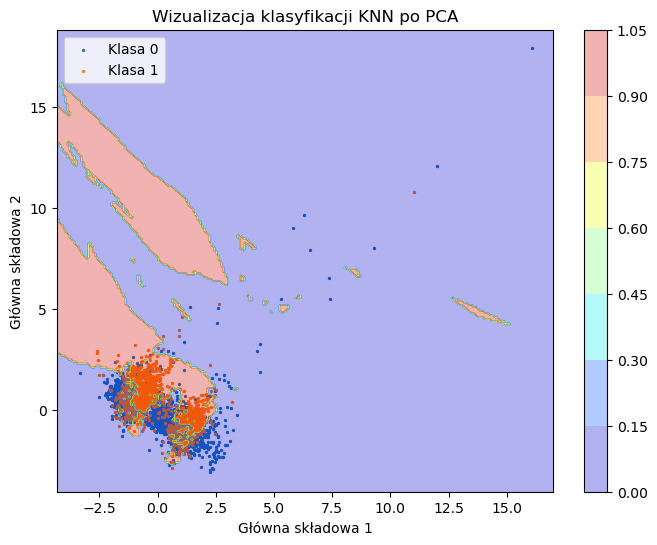

In [156]:
# Importy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Wczytanie zbioru California Housing
df = pd.read_csv("housing.csv")
print("Pełny zbiór danych:")
print(df.head())

# Ograniczenie do pierwszych 400 rekordów
#df = df.head(1800)

# Przygotowanie danych
X = df.drop(columns=['Target'])  # Wszystkie kolumny oprócz docelowej
y = df['Target']  # Zmienna docelowa (np. wartość domu)
y = np.where(y > y.median(), 1, 0)  # 1 = wysokie wartości, 0 = niskie wartości

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Normalizacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Redukcja wymiarowości za pomocą PCA
pca = PCA(n_components=2)  # Redukcja do 2 wymiarów
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Trenowanie KNN
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_pca, y_train)

# Predykcja KNN
y_pred = knn.predict(X_test_pca)
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred))

# Macierz konfuzji
cm = confusion_matrix(y_test, y_pred)
print("Macierz konfuzji:\n", cm)

# Wizualizacja wyników KNN na zbiorze testowym
plt.figure(figsize=(8, 6))
for label in np.unique(y_test):
    plt.scatter(
        X_test_pca[y_test == label, 0],
        X_test_pca[y_test == label, 1],
        label=f'Klasa {label}',
        s=2  # Rozmiar kropek (zmniejszony)
    )


# Wizualizacja granicy decyzyjnej KNN
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.1),
    np.arange(y_min, y_max, 0.1)
)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Granica decyzyjna
plt.contourf(xx, yy, Z, alpha=0.3, cmap='jet')

plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.title('Wizualizacja klasyfikacji KNN po PCA')
plt.legend()
plt.colorbar()
plt.show()
